# Q2............

## A) Read "image3" and convert it from BGR to RGB 

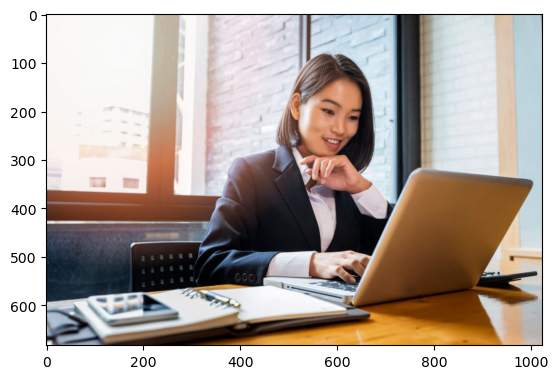

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert from BGR to RGB
image3 = cv.imread("image3.jpg")  # Replace with the actual path to "image3"
image3_rgb = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
plt.imshow(image3_rgb)
plt.show()

## B) Apply translation, rotation, and scaling to image3. Show the output in one row.

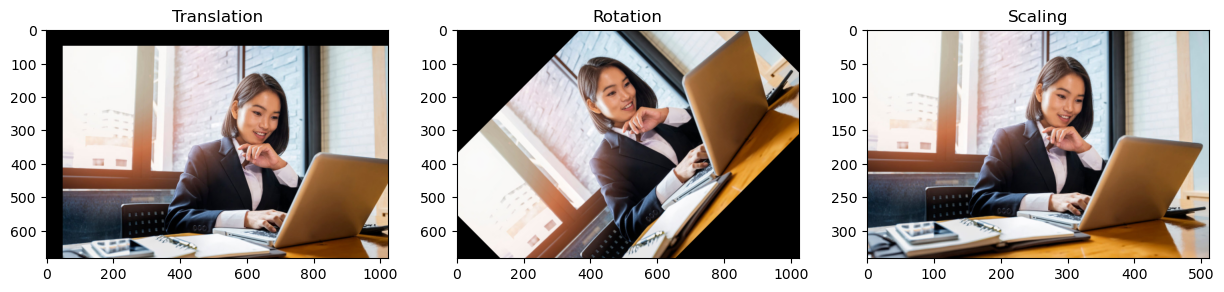

In [7]:
height, width = image3_rgb.shape[:2]

# Translation
tx, ty = 50, 50  # Translation in x and y directions
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv.warpAffine(image3_rgb, translation_matrix, (width, height))

# Rotation
angle = 45
rotation_matrix = cv.getRotationMatrix2D((width // 2, height // 2), angle, 1)
rotated_image = cv.warpAffine(image3_rgb, rotation_matrix, (width, height))

# Scaling
scaling_factor = 0.5
scaled_image = cv.resize(image3_rgb, None, fx=scaling_factor, fy=scaling_factor)

# Display the results of translation, rotation, and scaling
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(translated_image), plt.title('Translation')
plt.subplot(1, 3, 2), plt.imshow(rotated_image), plt.title('Rotation')
plt.subplot(1, 3, 3), plt.imshow(scaled_image), plt.title('Scaling')
plt.show()

## C) Detect edges in a grayscale image using Sobel, Laplacian, and Canny operators. Compare the results of each method. Show the output in one row.

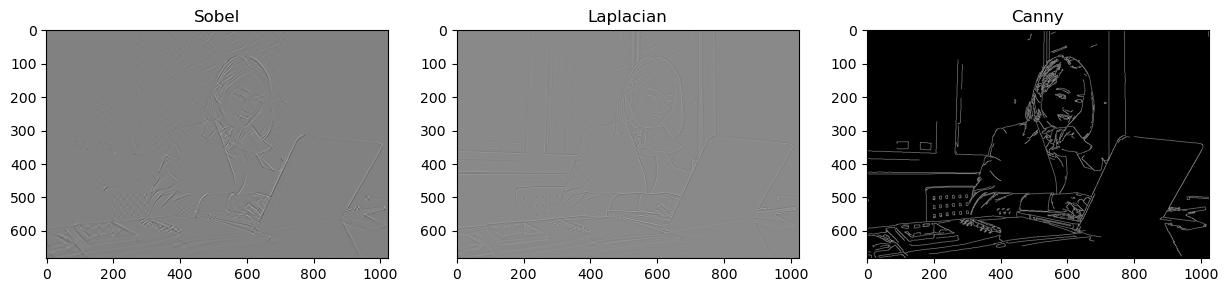

In [10]:
# Convert Image from RGB to GRAY 
gray_image3 = cv.cvtColor(image3_rgb, cv.COLOR_RGB2GRAY)

# Sobel Edge Detection
sobel_edges = cv.Sobel(gray_image3, cv.CV_64F, 1, 1, ksize=5)

# Laplacian Edge Detection
laplacian_edges = cv.Laplacian(gray_image3, cv.CV_64F)

# Canny Edge Detection
canny_edges = cv.Canny(gray_image3, 100, 200)

# Display the edge detection results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel')
plt.subplot(1, 3, 2), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian')
plt.subplot(1, 3, 3), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny')
plt.show()

## D) Perform global thresholding and adaptive thresholding on a grayscale image. Explain when adaptive thresholding is preferred over global thresholding. Show the output in one row

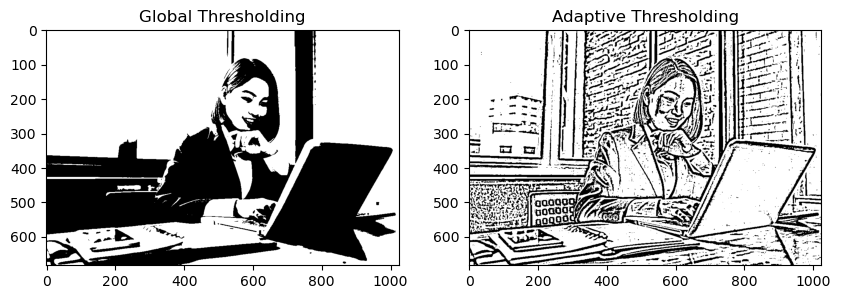

In [13]:
_, global_thresh = cv.threshold(gray_image3, 127, 255, cv.THRESH_BINARY)
adaptive_thresh = cv.adaptiveThreshold(gray_image3, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Display thresholding results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(global_thresh, cmap='gray'), plt.title('Global Thresholding')
plt.subplot(1, 2, 2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()

In [15]:
# Explanation:
# Adaptive thresholding is preferred when an image has varying lighting conditions, as it applies
# different threshold values to different regions based on the local mean or Gaussian-weighted mean.
# Global thresholding uses a single threshold value, which might not work well with non-uniform illumination.

## E) Use K-means clustering to segment an image into different color regions. Explain how K-means helps in image segmentation. Show the output in one row

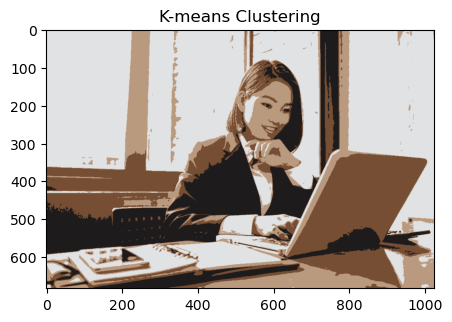

In [18]:
Z = image3_rgb.reshape((-1, 3))
Z = np.float32(Z)
K = 4  # Number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image3_rgb.shape)

# Display K-means segmentation
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image)
plt.title('K-means Clustering')
plt.show()

## F) Detect and visualize keypoints in an image using SIFT. Show the output in one row.

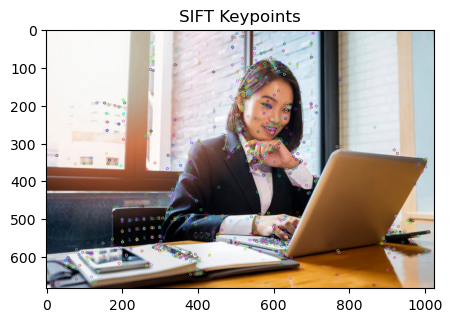

In [21]:
# Keypoint Detection using SIFT
sift = cv.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image3, None)
sift_image3 = cv.drawKeypoints(image3_rgb, keypoints, None)

# Display SIFT keypoints
plt.figure(figsize=(5, 5))
plt.imshow(sift_image3)
plt.title('SIFT Keypoints')
plt.show()